In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline


/kaggle/input/regression-technique-eda/House Price Regression Tecnique/sample_submission.csv
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/data_description.txt
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/Project On House Price data .ipynb
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv')
train_df.head(10)
# this is to read the number of the first five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
train_df.columns  = train_df.columns.str.lower()
# we are converting all the columns in the lowercase

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.duplicated().sum()
# train_df.drop_duplicates() no meaning of these as there is no missing values
train_df.columns.shape

(81,)

In [6]:
train_df = train_df.dropna( axis= 1)
train_df.columns
# here we have to be take care that the drop_na just make the copy of the dataset and not the make teh change in the real thing

Index(['id', 'mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation',
       'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagecars', 'garagearea', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saletype',
       'salecondition', 'saleprice'],
      dtype='object')

In [7]:
train_df.loc[:,'id' : 'overallqual']
train_df.iloc[:,0:5]
# there are two ways to select the sub set from the data set. One is interger based method and otherone is the label based method.

,id,mssubclass,mszoning,lotarea,street
0,1,60,RL,8450,Pave
1,2,20,RL,9600,Pave
2,3,60,RL,11250,Pave
3,4,70,RL,9550,Pave
4,5,60,RL,14260,Pave
...,...,...,...,...,...
1455,1456,60,RL,7917,Pave
1456,1457,20,RL,13175,Pave
1457,1458,70,RL,9042,Pave
1458,1459,20,RL,9717,Pave


# Lets start the EDA

## Univeriate Analysis

In [8]:
# .describe method will give the summary satistics
train_df.describe(percentiles=[0.1,0.2,0.3,0.4])


,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,146.900000,20.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,74.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
20%,292.800000,20.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,172.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
30%,438.700000,20.000000,8063.700000,5.000000,5.000000,1958.000000,1971.000000,0.000000,0.000000,280.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135500.000000
40%,584.600000,30.000000,8793.400000,6.000000,5.000000,1965.000000,1980.000000,218.600000,0.000000,374.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0, 0.5, 'Number of the observations')

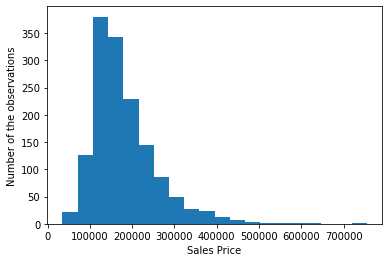

In [9]:
# graphical method
x = train_df.saleprice
plt.hist(x, bins = 20)
plt.xlabel('Sales Price')
plt.ylabel('Number of the observations')

<AxesSubplot:xlabel='saleprice', ylabel='Count'>

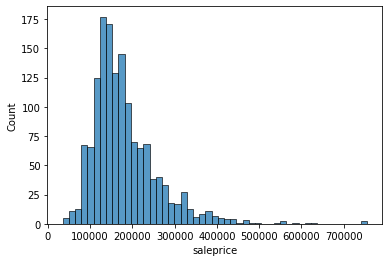

In [10]:
import seaborn as sns
sns.histplot(train_df, x = train_df.saleprice)